### K-MEANS CLUSTERING

In [46]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split ,StratifiedKFold, GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix,accuracy_score,  roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

#### 1. Generate simulated data or use any standard data set to perform K-means clustering on the data.


DATASET DESCRIPTION:

About the data: 145 patients who had diabetes, a family history of diabetes, who wanted a physical examination, or to participate in a scientific study participated in the study. For each patient:

rw: relative weight
fpg: fasting plasma glucose,
ga : area under the plasma glucose curve for the three hour glucose tolerance test (OGTT)

ina area under the plasma insulin curve for the (OGTT)

aapg: steady state plasma glucose response.

cc: diabetic category


In [47]:
df = pd.read_csv("C:/Users/nisha/OneDrive/Documents/Datasets/chemdiab.csv")
df

,rw,fpg,ga,ina,sspg,cc
0,0.81,80,356,124,55,Normal
1,0.95,97,289,117,76,Normal
2,0.94,105,319,143,105,Normal
3,1.04,90,356,199,108,Normal
4,1.00,90,323,240,143,Normal
...,...,...,...,...,...,...
140,1.05,353,1428,41,480,Overt_Diabetic
141,0.91,180,923,77,150,Overt_Diabetic
142,0.90,213,1025,29,209,Overt_Diabetic
143,1.11,328,1246,124,442,Overt_Diabetic


In [48]:
df1=df.drop("cc",axis=1)
df1

,rw,fpg,ga,ina,sspg
0,0.81,80,356,124,55
1,0.95,97,289,117,76
2,0.94,105,319,143,105
3,1.04,90,356,199,108
4,1.00,90,323,240,143
...,...,...,...,...,...
140,1.05,353,1428,41,480
141,0.91,180,923,77,150
142,0.90,213,1025,29,209
143,1.11,328,1246,124,442


In [49]:
# Standardising the data:
sc = StandardScaler()
df_sc = sc.fit_transform(df1)

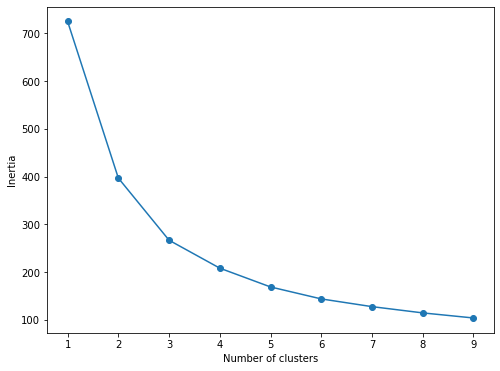

In [50]:
# Fitting multiple k-means algorithms and storing the values in an empty list

Inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_sc)
    Inertia.append(kmeans.inertia_)
    
# Elbow method

frame = pd.DataFrame({'Cluster':range(1,10), 'Inertia':Inertia})
plt.figure(figsize=(8,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The point of inflexion is 3. So we can take number of clusters to be 3 i.e optimal k is 3.

#### 2. Perform K-means clustering of the observations by varying the K values and assess the strength of the clusters.

In [51]:
# Fitting a k-means model for k=3. 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
y_kmeans = kmeans.fit_predict(df_sc)
y_kmeans  #predicted clusters

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1])

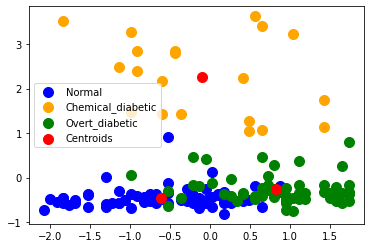

In [54]:
# Visualising the clusters:
plt.scatter(df_sc[y_kmeans == 0, 0], df_sc[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Normal')
plt.scatter(df_sc[y_kmeans == 1, 0], df_sc[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Chemical_diabetic')
plt.scatter(df_sc[y_kmeans == 2, 0], df_sc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Overt_diabetic')

# Plotting the centroids of the clusters:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


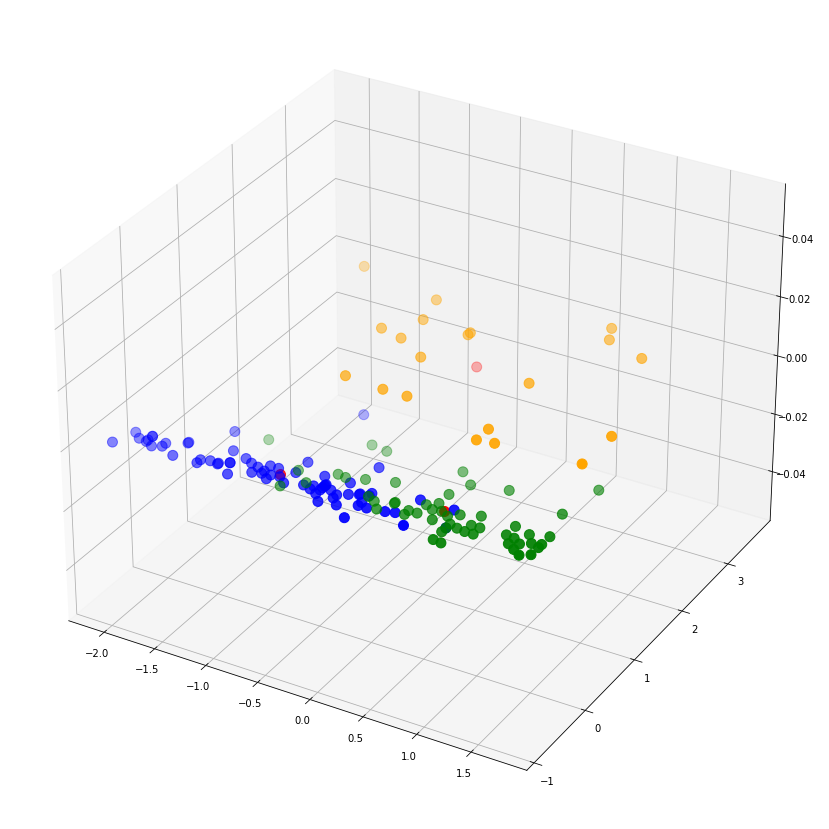

In [55]:
# 3d scatterplot using matplotlib:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(df_sc[y_kmeans == 0, 0], df_sc[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Normal')
plt.scatter(df_sc[y_kmeans == 1, 0], df_sc[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Chemical_diabetic')
plt.scatter(df_sc[y_kmeans == 2, 0], df_sc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Overt_diabetic')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()


In [64]:
# The number of clusters when k=3
df1["Cluster_k3"] = y_kmeans
df1["Cluster_k3"].value_counts()

0    70
2    55
1    20
Name: Cluster_k3, dtype: int64

In [56]:
# Fitting a k-means model for k=4..
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 33)
y_kmeans2 = kmeans.fit_predict(df_sc)
y_kmeans2

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 1,
       3, 1, 1, 3, 3, 1, 1, 0, 1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 3, 2,
       2, 0, 1, 3, 1, 2, 2, 2, 2, 0, 2, 2, 2])

In [57]:
#The number of clusters when k=3
df1["Cluster_k4"] = y_kmeans2
df1["Cluster_k4"].value_counts()

0    67
1    41
2    20
3    17
Name: Cluster_k4, dtype: int64

In [43]:
df1


,rw,fpg,ga,ina,sspg,Cluster_4,Cluster_3
0,0.81,80,356,124,55,0,0
1,0.95,97,289,117,76,0,0
2,0.94,105,319,143,105,0,0
3,1.04,90,356,199,108,1,0
4,1.00,90,323,240,143,0,0
...,...,...,...,...,...,...,...
140,1.05,353,1428,41,480,2,1
141,0.91,180,923,77,150,0,0
142,0.90,213,1025,29,209,2,1
143,1.11,328,1246,124,442,2,1


#### 3. If the class label is known to you then compare the cluster members to the class labels.

Text(0.5, 1.0, 'Original')

<Figure size 432x216 with 0 Axes>

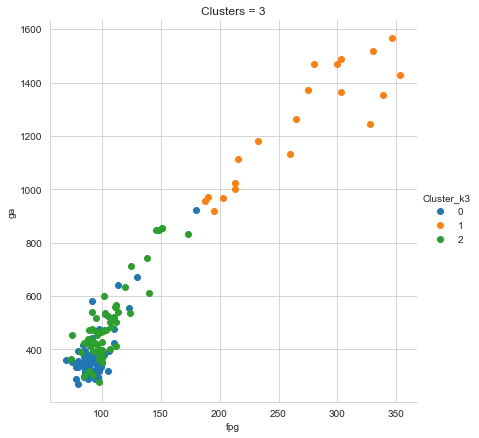

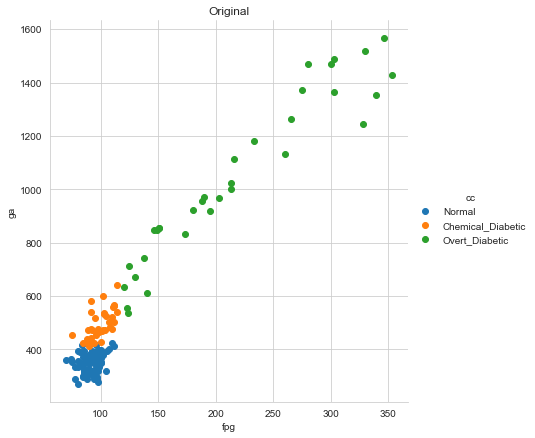

In [71]:
# Vizualisation for k=3
plt.figure(figsize=(6, 3))

sns.set_style("whitegrid")

sns.FacetGrid(df1, hue ="Cluster_k3", height = 6).map(plt.scatter, 'fpg', 'ga').add_legend()
plt.title("Clusters = 3")

# classes of chemdiab dataset.
sns.FacetGrid(df, hue ="cc", height = 6).map(plt.scatter,'fpg', 'ga').add_legend()
plt.title("Original")

Text(0.5, 1.0, 'Original')

<Figure size 432x216 with 0 Axes>

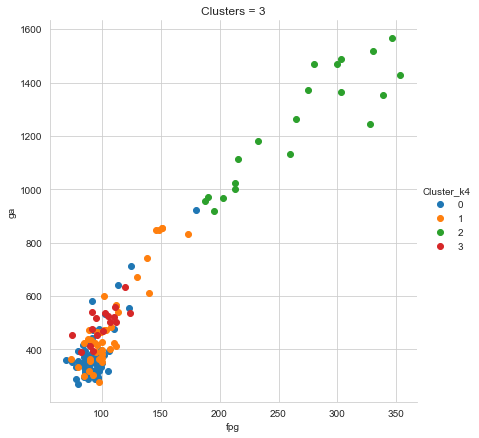

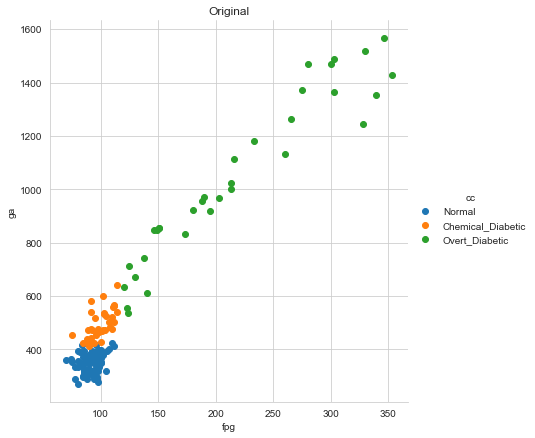

In [70]:
# Vizualisation for k=4
plt.figure(figsize=(6, 3))

sns.set_style("whitegrid")

sns.FacetGrid(df1, hue ="Cluster_k4", height = 6).map(plt.scatter,'fpg','ga').add_legend()
plt.title("Clusters = 3")
# classes of chemdiab dataset.
sns.FacetGrid(df, hue ="cc", height = 6).map(plt.scatter,'fpg','ga').add_legend()
plt.title("Original")